Contextual embeddings assign each word a **representation** based on its **context**, thereby capturing uses of words across varied contexts and encoding knowledge that transfers across languages

In [ ]:
import numpy as np
import pandas as pd

# One- Hot Encoding

In [ ]:
vocabulary = ['I','like','to','play','football','rome','paris','mango','apple']
one_hot_matrix={}

for i in range(len(vocabulary)):
    l = [0]*len(vocabulary)
    l[i]=1
    one_hot_matrix[vocabulary[i]] = l

In [ ]:
one_hot_matrix

{'I': [1, 0, 0, 0, 0, 0, 0, 0, 0],
 'apple': [0, 0, 0, 0, 0, 0, 0, 0, 1],
 'football': [0, 0, 0, 0, 1, 0, 0, 0, 0],
 'like': [0, 1, 0, 0, 0, 0, 0, 0, 0],
 'mango': [0, 0, 0, 0, 0, 0, 0, 1, 0],
 'paris': [0, 0, 0, 0, 0, 0, 1, 0, 0],
 'play': [0, 0, 0, 1, 0, 0, 0, 0, 0],
 'rome': [0, 0, 0, 0, 0, 1, 0, 0, 0],
 'to': [0, 0, 1, 0, 0, 0, 0, 0, 0]}

- One-hot vectors are high-dimensional and sparse, while word embeddings are low-dimensional and dense (they are usually between 50–600 dimensional). When you use one-hot vectors as a feature in a classifier, your feature vector grows with the vocabulary size; word embeddings are more computationally efficient.
- Also no similarity metrics can be computed

# Word2Vec - SkipGram, CBOW

The word2vec algorithms uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. In learning, these models take into account the context of the corpus in which the word occurs

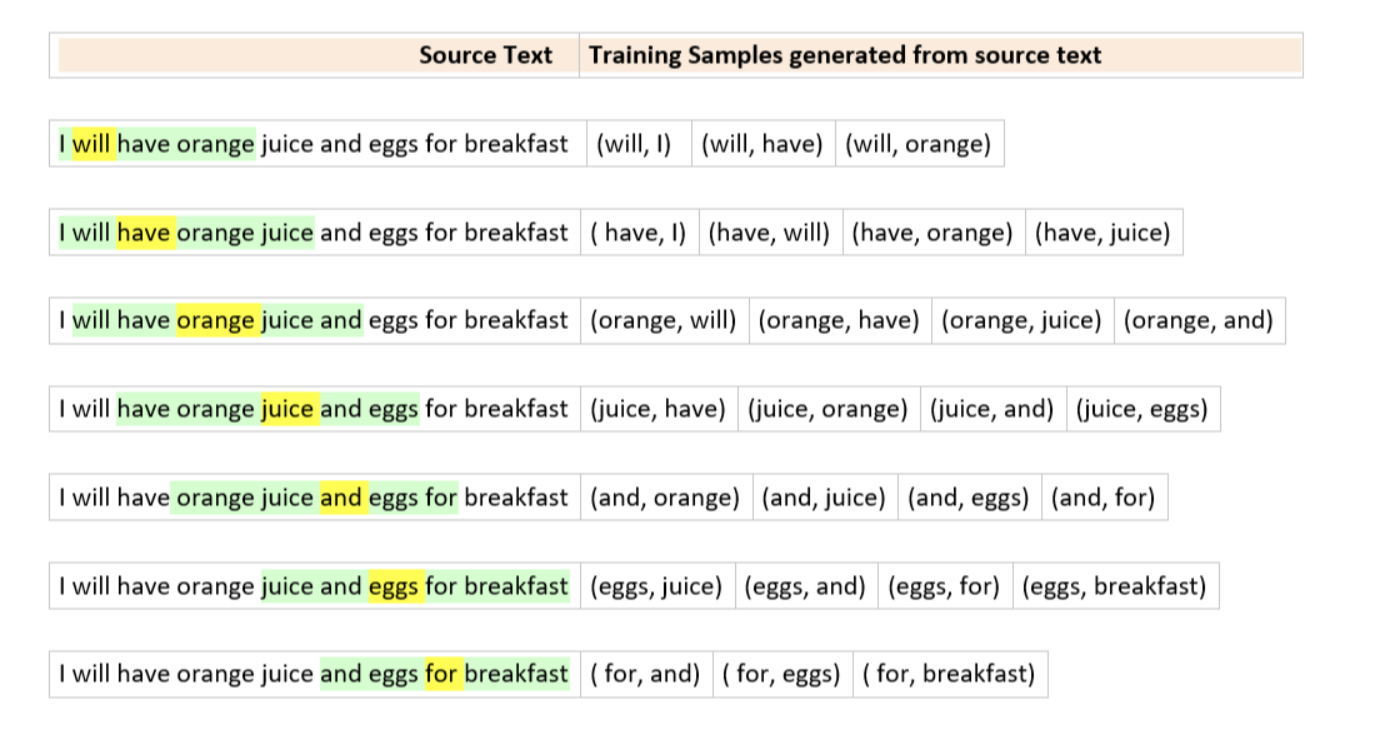

***In Skipgram:*** Each word starts with a [1x V] input, where V is the vocabulary size, W1:[V x E] and W2:[E x V] --> so the final output is softmaxed over [1xV] vector, giving the probability of the context word w.r.t the target word

***In CBOW:*** Just as presented in skipgram, two mapping weight vectors are used, although here, the target word is predicted throught the aggregation of context words


W1,W2 also known as word-vector lookup table

According to [1], it is found that Skip-Gram works well with small datasets, and can better represent less frequent words.
However, CBOW is found to train faster than Skip-Gram, and can better represent more frequent words.

[1]Efficient Estimation of Word Representations in
Vector Space (Mikolov et. al)

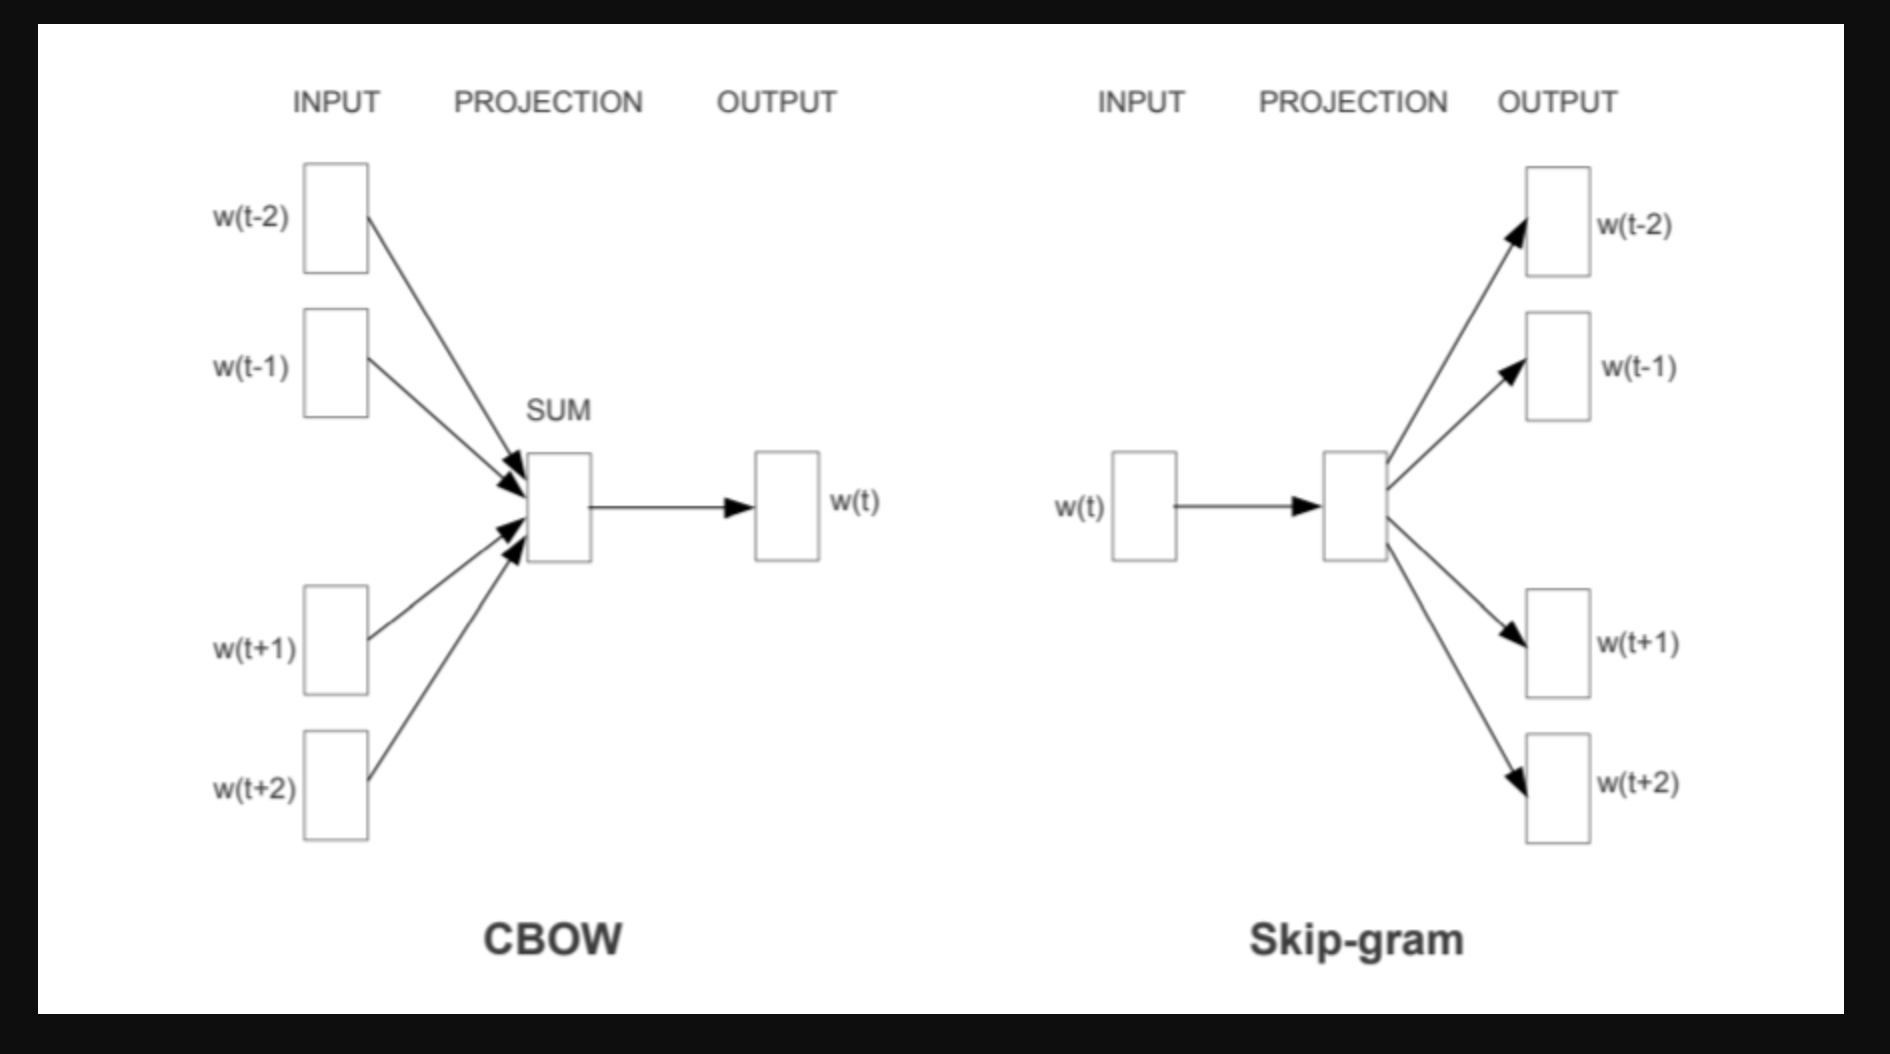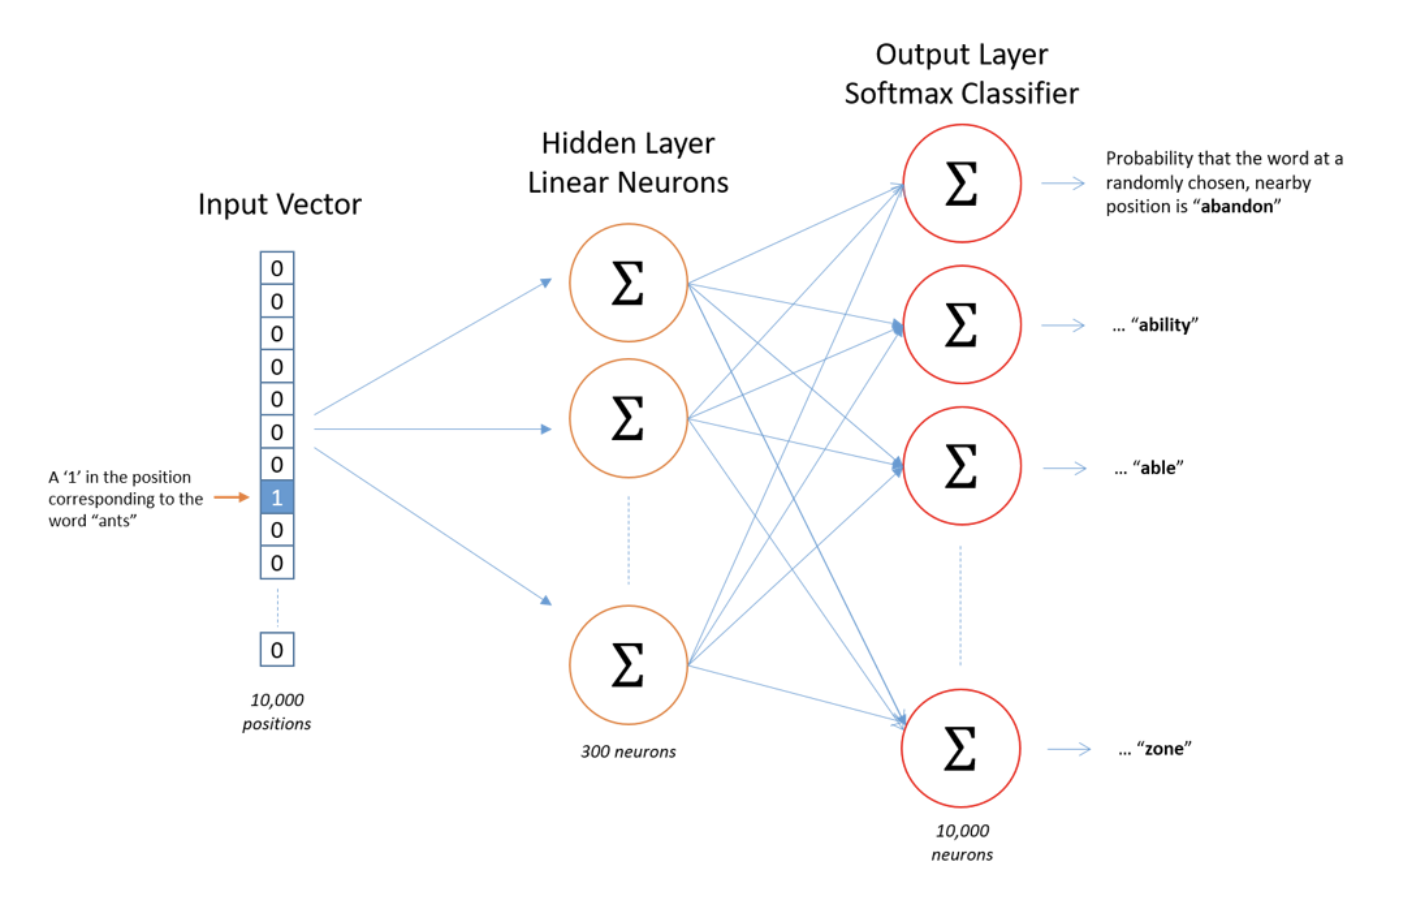

Gensim is a efficient suite of NLP tools for topic modeling. Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding for learning new word vectors from text.

Some important parameters for word2vec algorithms;

- size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window: (default 5) The maximum distance between a target word and words around the target word.
- min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- workers: (default 3) The number of threads to use while training.
- sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
model = Word2Vec(sentences=common_texts, size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [ ]:
# you can access the word vector of the word
# you can find the most similar set of words

vector = model.wv['computer']  # get numpy vector of a word
sims = model.wv.most_similar('computer', topn=10)  # get other similar words

In [ ]:
vector

array([-5.1113e-01, -4.7518e-01,  2.2871e-01,  8.6524e-03, -4.3737e-01,
       -2.8747e-01,  2.3416e-01, -2.0332e-02,  5.0697e-01, -2.4367e-01,
       -2.8646e-01, -2.4133e-02, -9.6845e-06,  4.8092e-02, -2.4467e-01,
       -1.2121e-01,  1.3644e-01, -1.6190e-01,  9.9349e-02,  3.6545e-02,
       -3.1657e-02, -8.4172e-01,  2.3022e-01,  3.0332e-02, -6.7638e-01,
       -2.9399e-01,  1.3298e-01, -3.7917e-02, -1.0970e-01,  2.6541e-03,
       -4.6669e-01,  1.2329e-01, -4.0373e-03, -2.8782e-01, -1.6733e-01,
        2.0938e-01,  4.9163e-01, -6.0818e-02,  1.4326e-01, -1.3628e-01,
       -1.5650e-01, -8.3060e-02, -8.5820e-02, -1.9864e-01,  3.6016e-01,
       -1.6752e-01, -6.4389e-03,  2.3173e-01, -1.6636e-01, -1.7120e-01,
        1.8400e-01, -5.2889e-01, -7.0440e-02, -3.7772e-01, -6.6473e-02,
        3.8519e-01,  2.6262e-01, -3.9148e-02, -2.8182e-01, -1.6908e-01,
       -4.9491e-01, -1.4138e-01,  4.1732e-01, -6.8889e-02,  1.0125e-01,
        1.8499e-02, -6.6256e-02,  1.9328e-01, -2.4784e-01,  2.50

In [ ]:
sims

[('survey', 0.24880872666835785),
 ('graph', 0.17101261019706726),
 ('minors', 0.14893710613250732),
 ('time', 0.13496547937393188),
 ('system', -0.01321972906589508),
 ('trees', -0.01757698506116867),
 ('interface', -0.06018204987049103),
 ('eps', -0.07148391753435135),
 ('response', -0.1064932569861412),
 ('human', -0.18449918925762177)]

In [ ]:
# Create Skip Gram model
model_sg = Word2Vec(sentences=common_texts, size=100, window=5, min_count=1, 
                    workers=4, sg = 1)

In [ ]:
sims = model_sg.wv.most_similar('survey', topn=10)
sims

[('computer', 0.24880871176719666),
 ('trees', 0.22305932641029358),
 ('eps', 0.19843041896820068),
 ('graph', 0.16472786664962769),
 ('time', 0.08369329571723938),
 ('response', 0.046992477029561996),
 ('interface', 0.03362823650240898),
 ('minors', 0.02807273343205452),
 ('human', -0.06605943292379379),
 ('system', -0.08288262784481049)]

# FastText

FastText is an extension to Word2Vec proposed by Facebook in 2016. Instead of feeding individual words into the Neural Network, FastText breaks words into several n-grams (sub-words). For instance, the tri-grams for the word apple is app, ppl, and ple (ignoring the starting and ending of boundaries of words). The word embedding vector for apple will be the sum of all these n-grams. After training the Neural Network, we will have word embeddings for all the n-grams given the training dataset. Rare words can now be properly represented since it is highly likely that some of their n-grams also appears in other words. I will show you how to use FastText with Gensim in the following section.

In [ ]:
from gensim.models import FastText  
from gensim.test.utils import common_texts
model_FastText = FastText(size=4, window=3, min_count=1)
model_FastText.build_vocab(sentences=common_texts)
model_FastText.train(sentences=common_texts, total_examples=len(common_texts), epochs=10)

# FastText comparison

In [ ]:
doc = lxml.etree.parse('/content/drive/MyDrive/ted_en-20160408.xml')

In [ ]:
input_text = '\n'.join(doc.xpath('//content/text()'))

In [ ]:
# remove parenthesis 
input_text_noparens = re.sub(r'\([^)]*\)', '', input_text)
# store as list of sentences
sentences_strings_ted = []
for line in input_text_noparens.split('\n'):
    m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
    sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
# store as list of lists of words
sentences_ted = []
for sent_str in sentences_strings_ted:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    sentences_ted.append(tokens)

In [ ]:
from gensim.models import FastText
model_ted = FastText(sentences_ted, size=100, window=5, min_count=5, workers=4,sg=1)

In [ ]:
model_ted.wv.most_similar("Gastroenteritis")

[('arthritis', 0.8582865595817566),
 ('iliac', 0.8199431896209717),
 ('h1n1', 0.8140575885772705),
 ('gbm', 0.801042914390564),
 ('iucn', 0.799737274646759),
 ('kp', 0.799689531326294),
 ('anthrax', 0.7974656820297241),
 ('deinococcus', 0.7945053577423096),
 ('kpis', 0.7907205820083618),
 ('mitochondrial', 0.7898839712142944)]

In [ ]:
from gensim.models import Word2Vec
model_ted_w2v = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model_ted_w2v.wv.most_similar("Gastroenteritis")

KeyError: ignored

Even though the word Gastroenteritis does not exist in the training dataset, it is still capable of figuring out this word is closely related to some medical terms. If we try this in the Word2Vec defined previously, it would pop out error because such word does not exist in the training dataset. Although it takes longer time to train a FastText model (number of n-grams > number of words), it performs better than Word2Vec and allows rare words to be represented appropriately.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


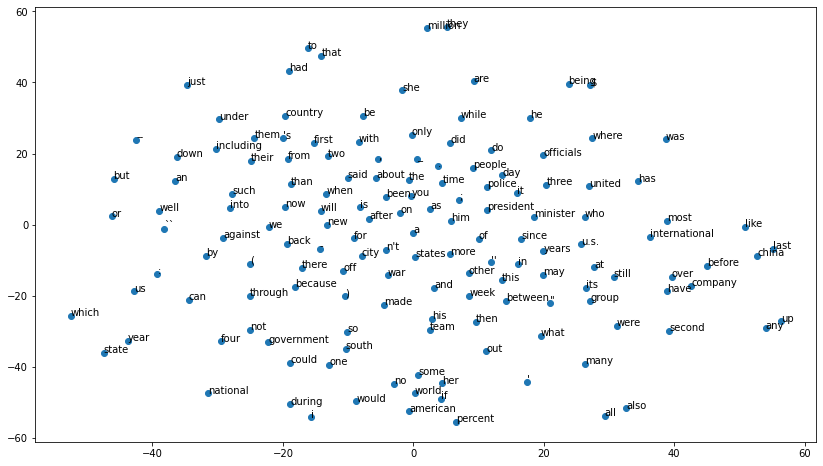

In [ ]:
distri = TSNE(n_components=2)
words = list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
y = distri.fit_transform(vectors[100:250])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

# GloVe Embedding

The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors.

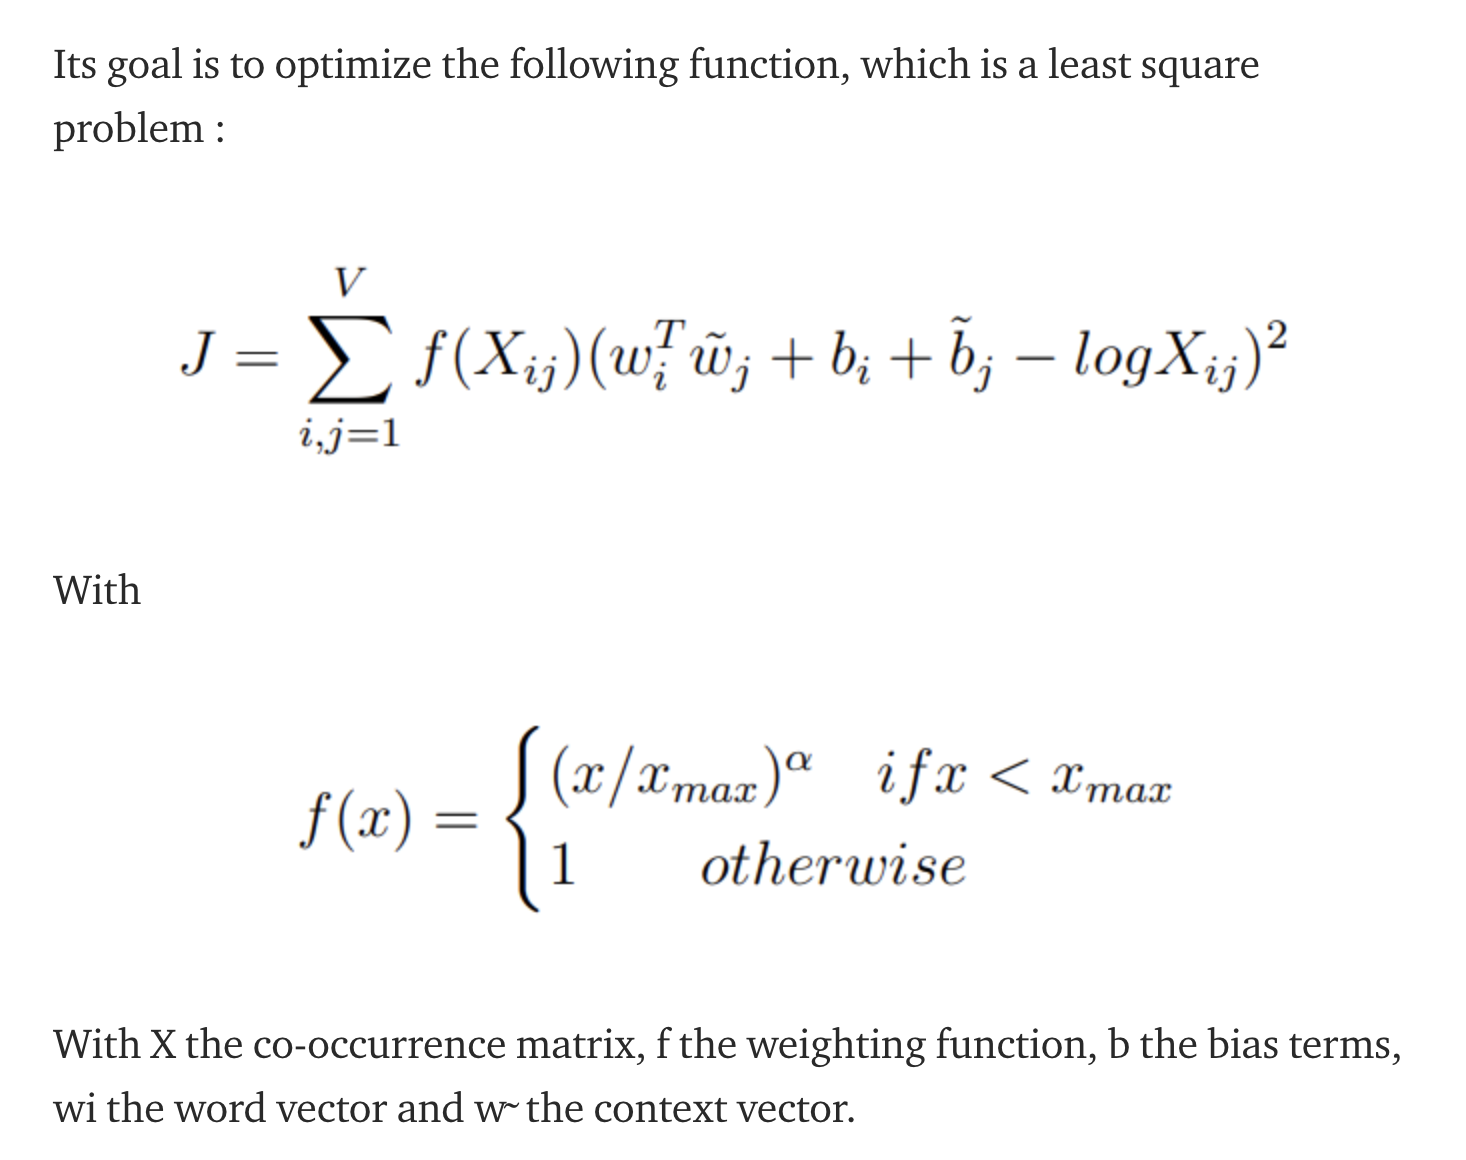

In [ ]:
import numpy as np
import os
from random import shuffle
import re
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np
import urllib.request

https://nlp.stanford.edu/projects/glove/

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [ ]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7f8ae843e550>)

In [ ]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [ ]:
# here you can see that each of the 100d,200d etc. represents the dimension of the embedding

In [ ]:
emmbed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [ ]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [ ]:
find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'tributary',
 'confluence',
 'creek',
 'along',
 'tributaries',
 'valley',
 'flows',
 'danube']

In [ ]:
# GloVe improves performance as the embedding space allows us to develop analogies and not just similarity

find_similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'princess',
 'crown',
 'throne',
 'royal',
 'monarch',
 'kingdom',
 'duke']

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [ ]:
# Now we can load it and perform the same (king – man) + woman = ?

from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
